# M2 - Brief 0 - Analyse et traitement d'un dataset

In [1]:
!pip install -r requirements.txt

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8): No such file or directory


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import missingno as msno

## Dataset source brut

Celui-ci est chargé dans le dataframe `df`.

In [3]:
df = pd.read_csv('data/data-numeric-only-68482ee23b874759059690.csv')
df.head()

,age,taille,poids,revenu_estime_mois,historique_credits,risque_personnel,score_credit,loyer_mensuel,montant_pret
0,73,161.1,67.3,857,NaN,0.11,615.0,1377.97,13157.101646
1,44,168.2,74.9,5245,2.0,0.79,NaN,10000.00,32408.309272
2,71,160.3,45.5,3792,0.0,0.13,NaN,5000.00,17975.461375
3,62,161.9,87.7,3291,NaN,0.32,NaN,10000.00,16004.737731
4,18,178.0,77.6,3893,NaN,0.66,NaN,NaN,10437.682760


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 10000 non-null  int64  
 1   taille              10000 non-null  float64
 2   poids               10000 non-null  float64
 3   revenu_estime_mois  10000 non-null  int64  
 4   historique_credits  4707 non-null   float64
 5   risque_personnel    10000 non-null  float64
 6   score_credit        4694 non-null   float64
 7   loyer_mensuel       7094 non-null   float64
 8   montant_pret        10000 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 703.3 KB


Supression des duplication

In [5]:
df = df.drop_duplicates()

Récupérer les valeurs significativ du dataset via `df.describe()`

In [6]:
df.describe()

,age,taille,poids,revenu_estime_mois,historique_credits,risque_personnel,score_credit,loyer_mensuel,montant_pret
count,10000.000000,10000.000000,10000.000000,10000.000000,4707.000000,10000.000000,4694.000000,7094.00000,10000.000000
mean,46.516500,170.003760,70.064080,2520.996200,2.543446,0.499094,573.495952,5175.89104,9149.762575
std,16.832845,10.006542,15.014911,1157.532502,1.691198,0.290107,159.140639,3750.61004,10785.937404
min,18.000000,119.200000,10.500000,500.000000,0.000000,0.000000,300.000000,-395.25000,500.000000
25%,32.000000,163.200000,59.800000,1683.000000,1.000000,0.240000,437.000000,985.76750,500.000000
50%,46.000000,170.100000,70.200000,2480.000000,3.000000,0.500000,574.000000,5000.00000,3600.605667
75%,61.000000,176.800000,80.300000,3304.000000,4.000000,0.750000,712.000000,10000.00000,16245.534725
max,75.000000,209.800000,145.200000,6826.000000,5.000000,1.000000,849.000000,10000.00000,53192.053509


On vois que le dataset est complet pour les données age, taille, poids, revenu_estime_mois, risque_personnel et montant_pret

Ci dessous des représentation visuelle des données manquantes

_pour l'exo on estrait un sample de 500 ligne sur les 1000 mais on peux travailer avec le dataset complet_

<Axes: >

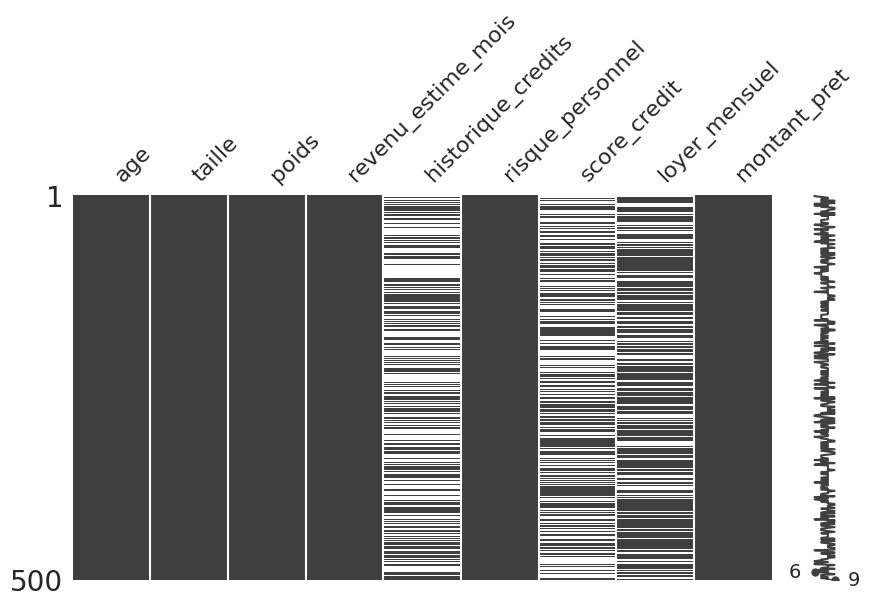

In [7]:
df_sample = df.sample(500)
msno.matrix(df_sample, figsize=(10,5))

<Axes: >

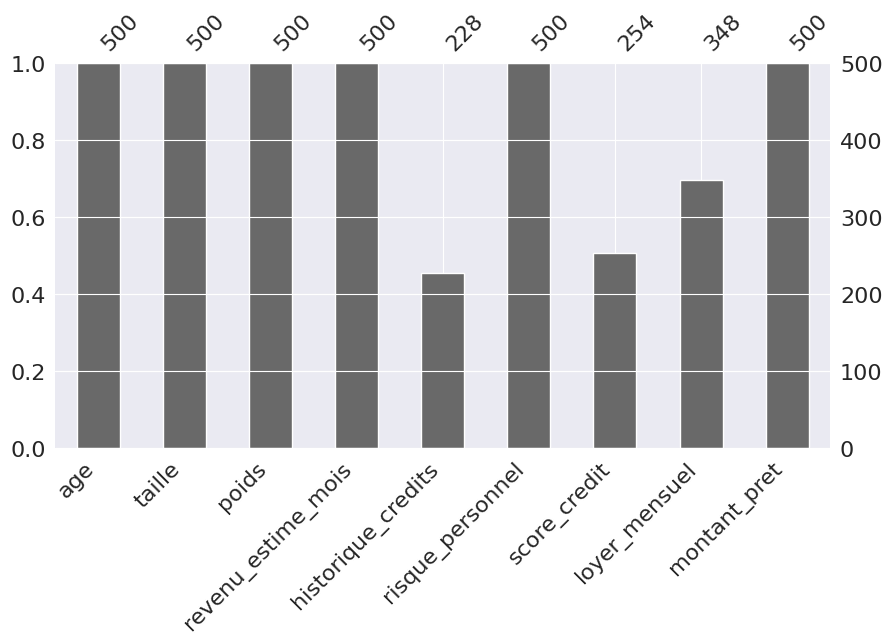

In [8]:
msno.bar(df_sample, figsize=(10,5))

Par curiosité, on redessine les bar avec le set de données complet pour voir si la distribution reste la même

<Axes: >

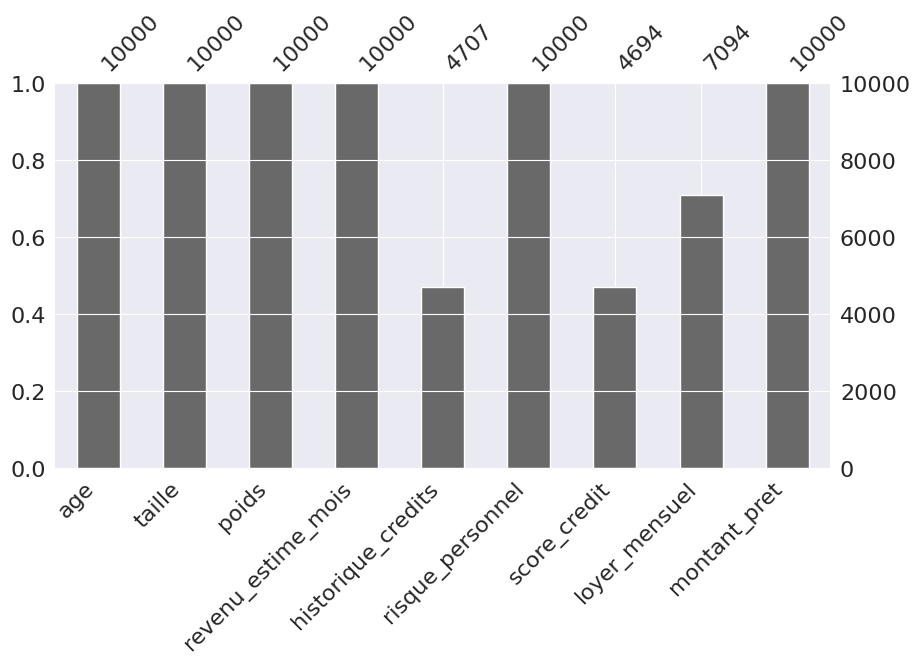

In [9]:
msno.bar(df, figsize=(10,5))

C'est globalement la même distribution. Cependant quelques interogations:
* il est probable que les données s'améliorent au cours du temps, au debut du fichier, beaucoup de données manquante alors que les données sont globalement completes en fin de fichier
* comment .sample() extrait les données ?
* Comment ca bosse sur les trés gros set de données.

## Recherche de corrélation

On cherche maintenant à établir s'il existe une corrélation entre les données manquante, c'est a dire on cherche a déterminer si l'absence d'une données implique ou non l'absence ou la présence d'une autre.

On commence par utiliser la heatmap sur les 3 colonnes ou la donnée est manquante.

3 colonnes manque de données, on affine pour avoir des valeurs chiffrée plus parlante.

La heatmap indique un score de correlation :
* une valeur proche de 0 indique qu'il n'y a pas de correlation entre une valeur A et une valeur B
* une valeur proche de -1 indique que la présence de A implique l'absence de B
* une valeur proche de 1 indique que la présence de A implique la présence de B

<Axes: >

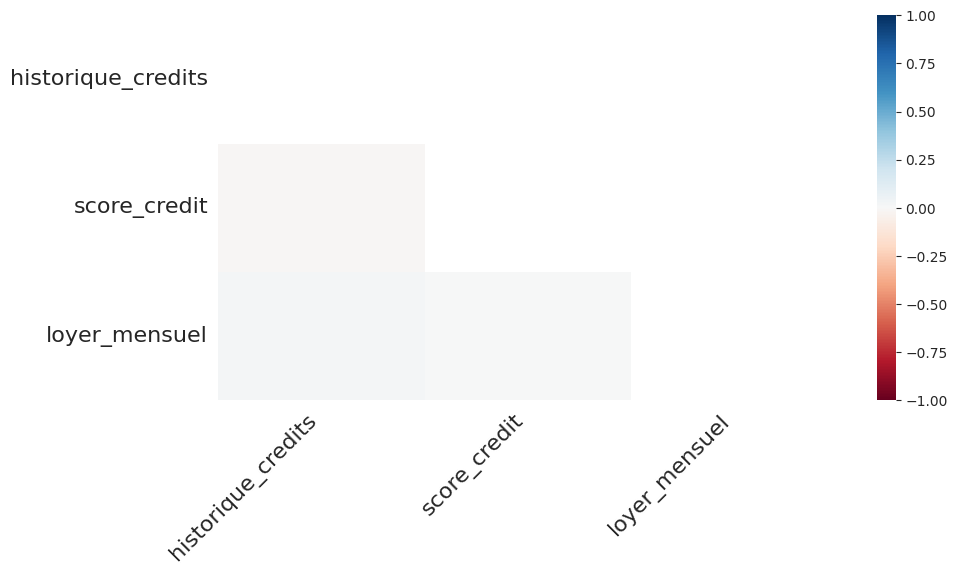

In [10]:
msno.heatmap(df[['historique_credits', 'score_credit', 'loyer_mensuel']], figsize=(10,5))

Le graphe nous montre des données proches de zéro. Ceci semble indiquer qu'il n'y a pas de corrélation directe entre ces valeurs.

<Axes: >

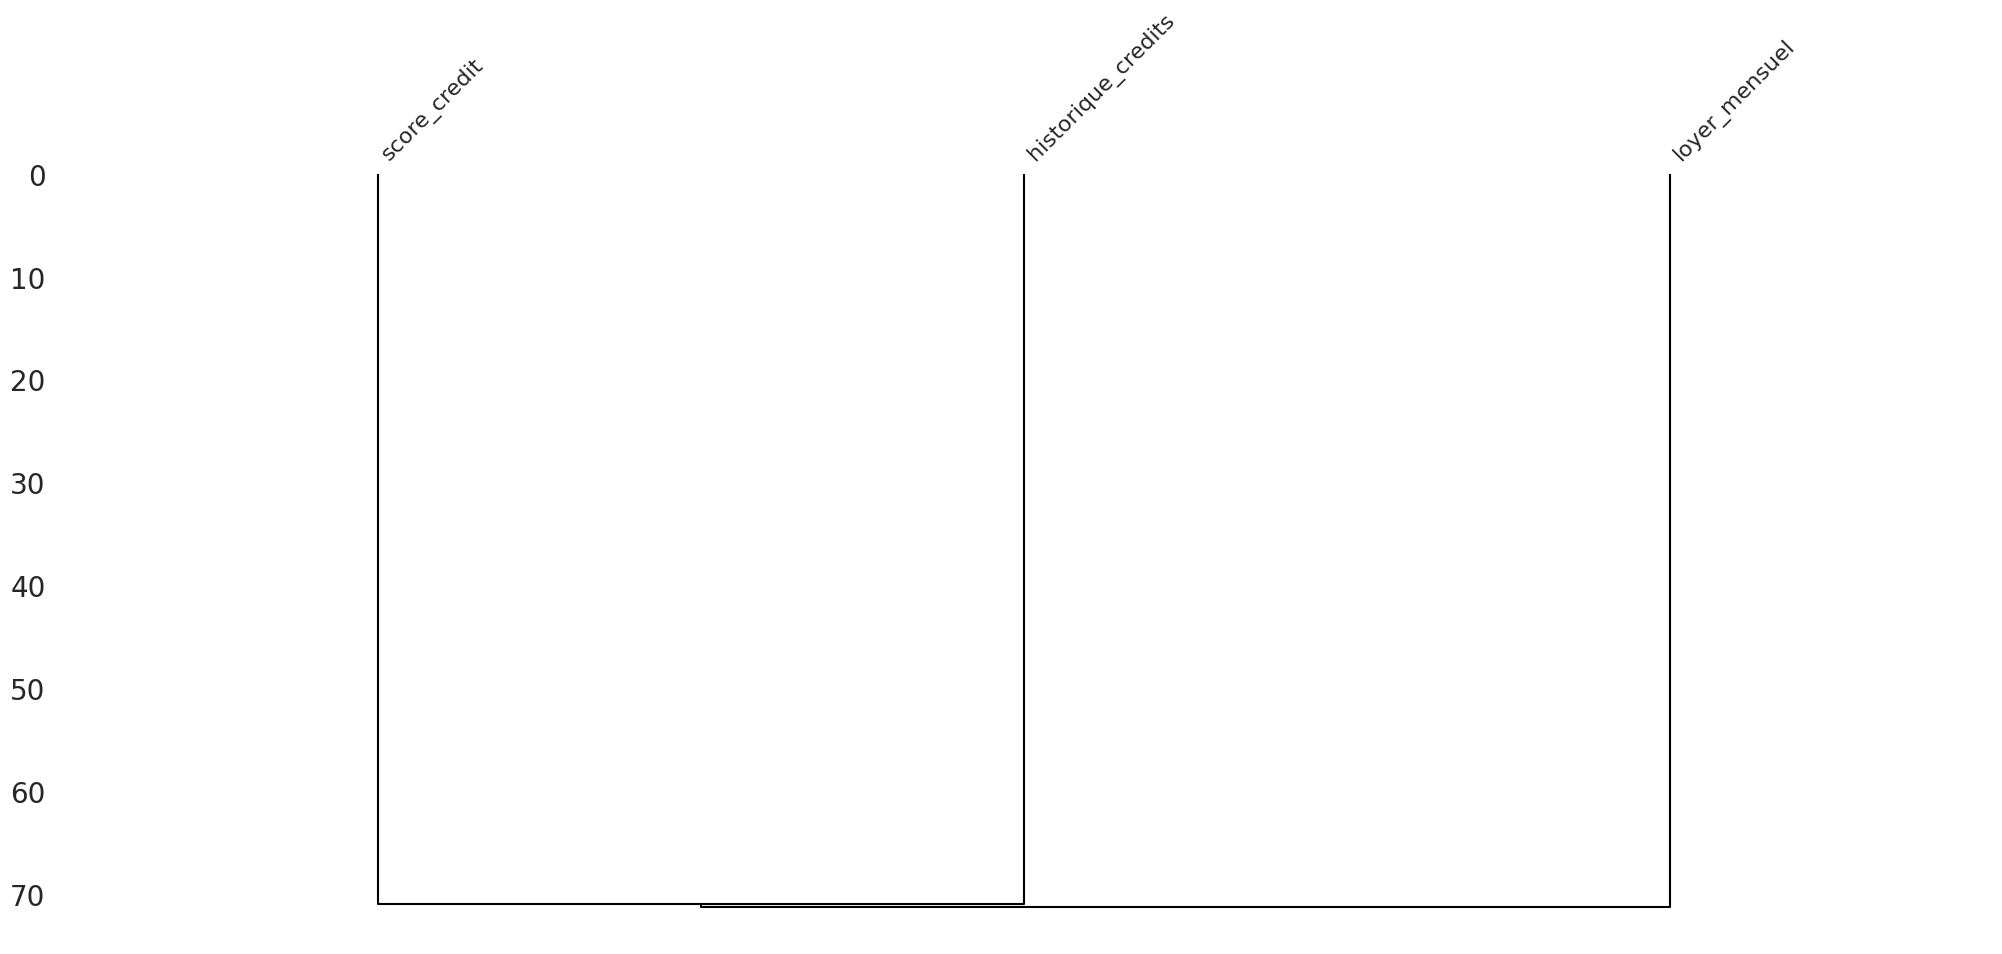

In [11]:
msno.dendrogram(df[['historique_credits', 'score_credit', 'loyer_mensuel']])

Apres vérification via le dendrographe, il n'y a pas de correlation entre les valeurs manquantes.

## Nettoyage des données

### elimination des lignes ou plus de 2% des données sont manquante

In [12]:
nb_colonnes = df.shape[1]
print (nb_colonnes)

9


## Outliers

On va déterminer les outliers du dataset.


## Nettoyage du dataset

On supprime les colonnes jugé inutiles ou ne respectant pas les réglementations, mon choix s'arrête sur :
* taille : la taille n'a pas de raisons d'être, un pret ne va pas être accorder en fonction de la taille.
*